In [261]:
import pandas as pd
import re

# Path to your log file
log_file = 'shell_grid_double_refined_sgn.log'

# Read the file
with open(log_file, 'r') as f:
    lines = f.readlines()

# Define column names based on header in log
columns = [
    "Iter", "dir", "h_norm", "Cost", "New_Cost", 
    "r_norm", "r_new_norm", "D_time", "E_time", "T_time", "Status"
]

# Prepare a list to hold parsed rows
data = []

for line in lines:
    # Skip empty or header lines
    if line.strip().startswith('#') or not line.strip():
        continue

    # Extract values using regex
    match = re.match(
        r"\s*(\d+)\s+([-+.\deE]+)\s+([-+.\deE]+)\s+([-+.\deE]+)\s+([-+.\deE]+)\s+([-+.\deE]+)\s+([-+.\deE]+)"
        r"\s+D=([\d.]+)s E=([\d.]+)s T=([\d.]+)s\s+(\w+)", 
        line
    )
    if match:
        data.append([float(match.group(i)) if i != 11 else match.group(i) for i in range(1, 12)])

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Example usage
print(df.head())

   Iter       dir    h_norm      Cost  New_Cost    r_norm  r_new_norm  D_time  \
0   1.0 -0.893834  0.289428  0.619850  0.504144  0.090166    0.083581   0.041   
1   2.0 -0.789467  0.227845  0.504144  0.417576  0.083581    0.076047   0.040   
2   3.0 -0.757773  0.188593  0.417576  0.350017  0.076047    0.066184   0.041   
3   4.0 -0.733038  0.159678  0.350017  0.296404  0.066184    0.053359   0.040   
4   5.0 -0.719777  0.136725  0.296404  0.253571  0.053359    0.043253   0.041   

   E_time  T_time    Status  
0   0.103   0.144  ACCEPTED  
1   0.102   0.142  ACCEPTED  
2   0.101   0.142  ACCEPTED  
3   0.100   0.140  ACCEPTED  
4   0.107   0.148  ACCEPTED  


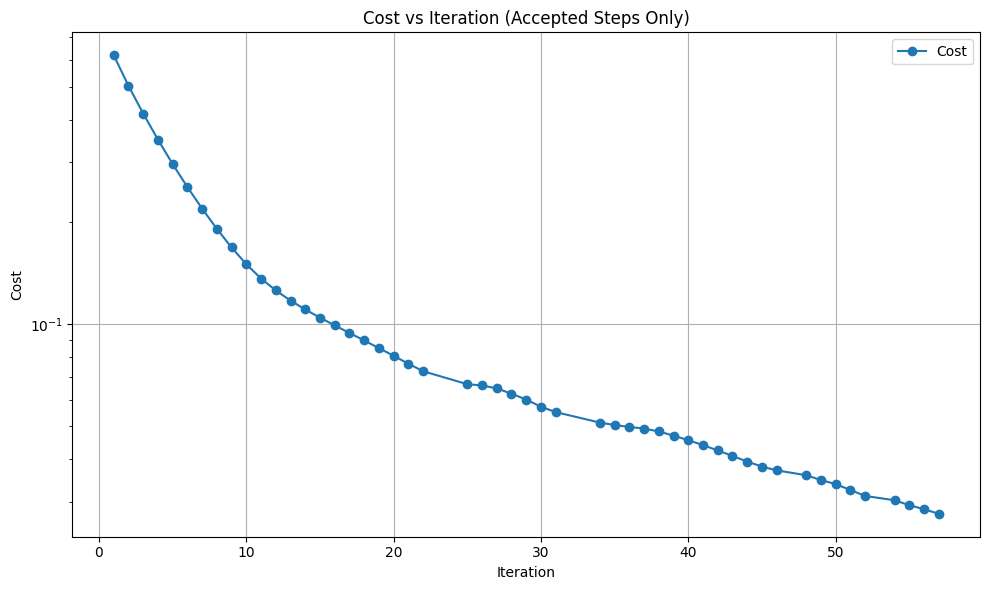

In [262]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Filter only accepted iterations
df_accepted = df[df['Status'] == 'ACCEPTED']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_accepted['Iter'], df_accepted['Cost'], label='Cost', marker='o')
# plt.plot(df_accepted['Iter'], df_accepted['New_Cost'], label='New Cost', marker='x')

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration (Accepted Steps Only)')
plt.yscale('log')  # Optional: Use log scale if cost varies a lot
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

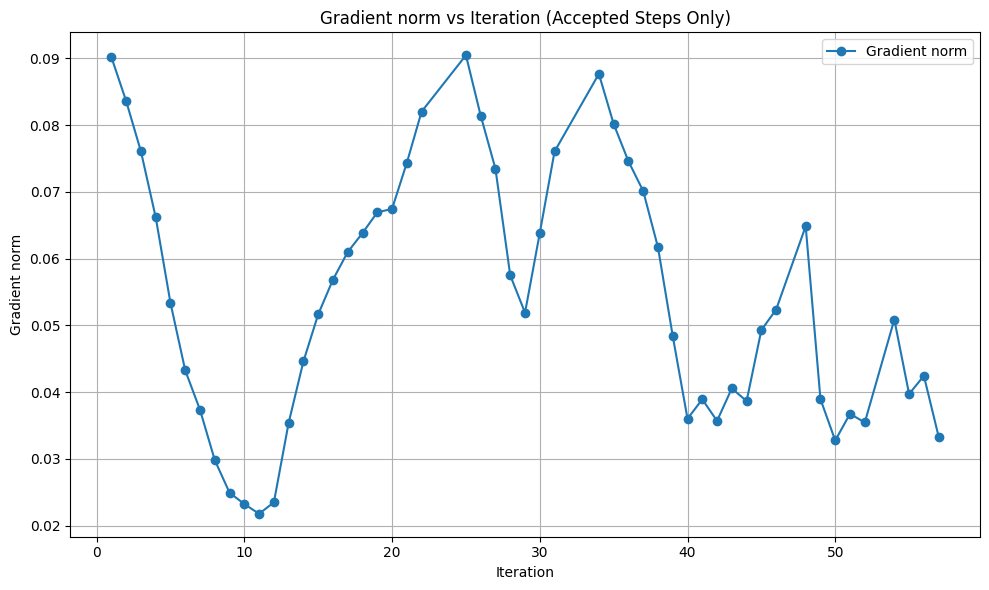

In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame
# Filter only accepted iterations
df_accepted = df[df['Status'] == 'ACCEPTED']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_accepted['Iter'], df_accepted['r_norm'], label='Gradient norm', marker='o')
# plt.plot(df_accepted['Iter'], df_accepted['New_Cost'], label='New Cost', marker='x')

plt.xlabel('Iteration')
plt.ylabel('Gradient norm')
plt.title('Gradient norm vs Iteration (Accepted Steps Only)')
# plt.yscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

   Iter      h_norm  step_size         cost  new_cost   grad_norm  \
0     1  463.845000     0.0100  1065.470000  6.520000  463.845000   
1     2   44.438500     0.0080     6.520000  0.734218   44.438500   
2     3   16.305900     0.0064     0.734218  0.034780   16.305900   
3     4    3.636740     0.0064     0.034780  0.002596    3.636740   
4     5    0.983751     0.0064     0.002596  0.000195    0.983751   

   new_grad_norm     time    status  
0      44.438500  1.39603  ACCEPTED  
1      16.305900  2.19198  ACCEPTED  
2       3.636740  2.86532  ACCEPTED  
3       0.983751  2.85775  ACCEPTED  
4       0.264997  2.88965  ACCEPTED  


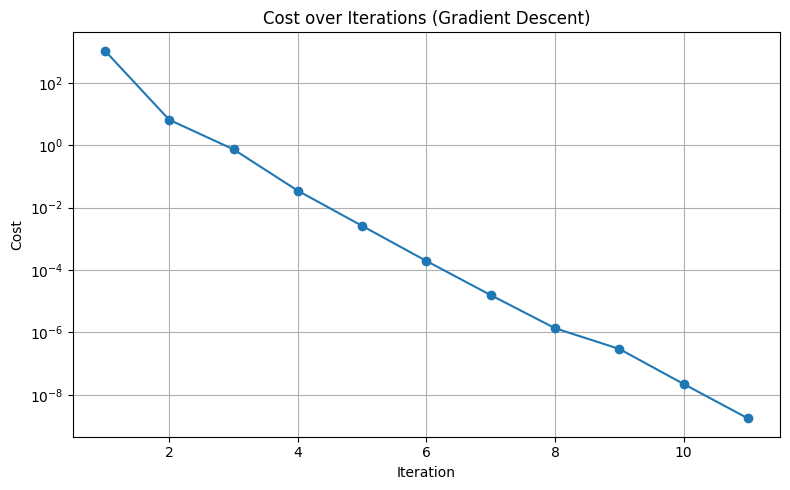

In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Read the log file
with open("grid_double_refined_gd.log", "r") as f:
    lines = f.readlines()

# Skip the header
data_lines = [line.strip() for line in lines if re.match(r"\s*\d+", line)]

# Prepare parsed rows
parsed_rows = []

for line in data_lines:
    parts = line.split()
    # print(parts)
    if len(parts) < 9:
        continue  # skip malformed lines

    row = {
        "Iter": int(parts[0]),
        "h_norm": float(parts[1]),
        "step_size": float(parts[2]),
        "cost": float(parts[3]),
        "new_cost": float(parts[4]),
        "grad_norm": float(parts[5]),
        "new_grad_norm": float(parts[6]),
        "time": float(parts[7].split('=')[-1].replace('s', '')),
        "status": parts[-1]
    }
    parsed_rows.append(row)

# Convert to DataFrame
df = pd.DataFrame(parsed_rows)

# Print DataFrame (optional)
print(df.head())

# Plot cost
plt.figure(figsize=(8, 5))
plt.plot(df["Iter"], df["cost"], marker='o')
plt.title("Cost over Iterations (Gradient Descent)")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
# plt.savefig("cost_plot.png")
plt.show()


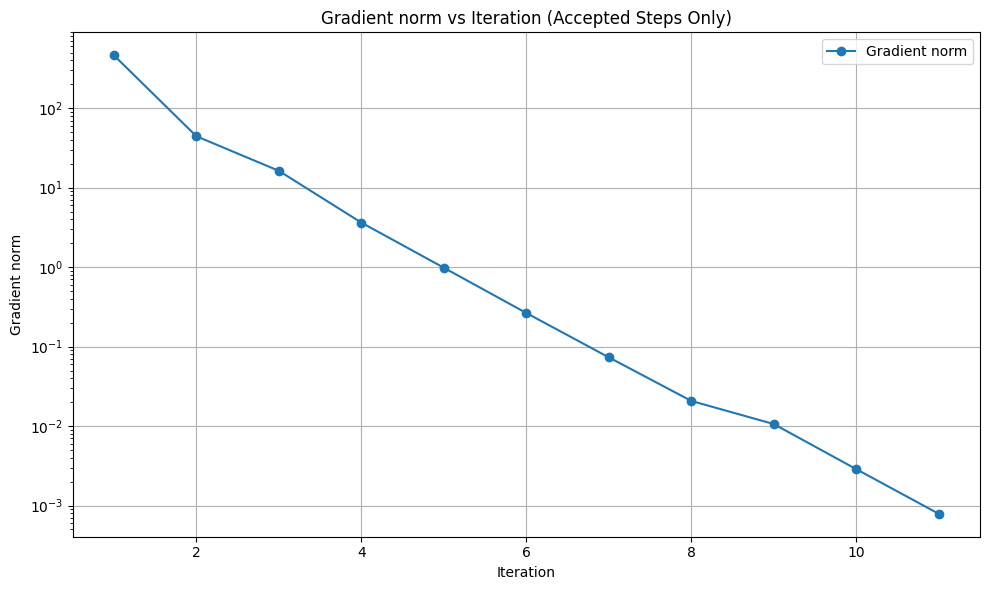

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame
# Filter only accepted iterations
df_accepted = df[df['status'] == 'ACCEPTED']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_accepted['Iter'], df_accepted['grad_norm'], label='Gradient norm', marker='o')
# plt.plot(df_accepted['Iter'], df_accepted['New_Cost'], label='New Cost', marker='x')

plt.xlabel('Iteration')
plt.ylabel('Gradient norm')
plt.title('Gradient norm vs Iteration (Accepted Steps Only)')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

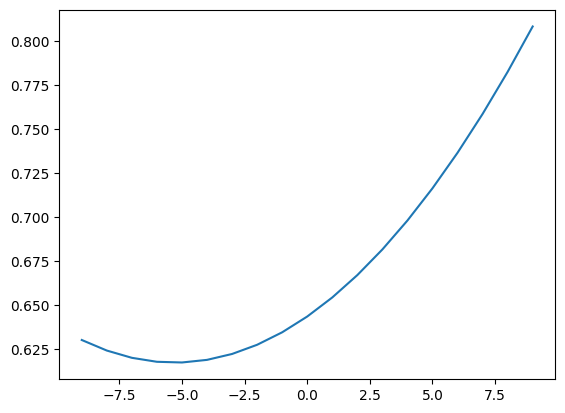

In [266]:
x = [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [0.630043, 0.624047, 0.61992, 0.617663, 0.617274, 0.618755, 0.622105, 0.627324, 0.634412, 0.643369, 0.654196, 0.666892, 0.681456, 0.69789, 0.716194, 0.736366, 0.758408, 0.782318, 0.808098]
plt.plot(x, y)